## final project - couses of death in the world
### group J
Group members:
1. [import data](#section1)
2. [](#section2)
3. [](#section3)
4. [](#section4)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from scipy import misc
import plotly.graph_objs as gobj
from IPython.display import HTML
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os

We found our data.... 

In [ ]:
url='https://raw.githubusercontent.com/WeilDaniel/DataScience2021B/main/causes%20of%20death.csv'
doc= pd.read_csv(url)
doc[::5]

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Lower respiratory infections,Intestinal infectious diseases,Protein-energy malnutrition,Terrorism,Cardiovascular diseases,...,Neonatal disorders,Alcohol use disorders,Exposure to forces of nature,Diarrheal disease,Environmental heat and cold exposure,Nutritional deficiencies,Self-harm,Conflict and terrorism,Diabetes mellitus,Poisonings
0,Afghanistan,AFG,1990,NaN,6469.977091,22836.91235,295.382206,1607.703797,12.0,46498.08502,...,18075.800290,75.595221,0.000000,8817.260208,226.789403,1667.386134,740.448500,1489.999290,3361.736409,170.742286
5,Afghanistan,AFG,1995,NaN,10122.772830,34483.55190,363.583913,2507.115188,5.0,52072.36867,...,30758.544710,91.819330,380.999985,14767.431170,118.013587,2595.907455,1065.582016,5508.000168,3665.833847,249.757440
10,Afghanistan,AFG,2000,NaN,9761.290717,31769.17538,358.006996,2114.510638,38.0,54523.55244,...,29562.611950,91.598058,0.000000,12938.353280,134.081689,2202.312536,1171.900184,5429.002257,4012.101851,257.354125
15,Afghanistan,AFG,2005,NaN,10059.371500,32720.36869,485.893244,2071.851381,367.0,54317.54190,...,30810.793890,94.548300,561.000068,12787.360150,187.399536,2176.986649,1357.231136,2078.000062,4601.599971,312.903566
20,Afghanistan,AFG,2010,NaN,7154.319444,23950.01729,332.253781,1541.841155,1157.0,52712.68782,...,27018.706950,102.648045,349.999997,7530.046788,151.683206,1619.355103,1457.157631,8117.000620,4825.933668,304.808594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,Zimbabwe,ZWE,1997,NaN,1097.174528,7735.56835,10.035450,1973.577671,NaN,11258.69582,...,7210.394169,61.658450,0.000000,3931.833317,33.858413,2013.555237,1652.696523,0.000000,1460.041977,278.080926
6670,Zimbabwe,ZWE,2002,NaN,1767.653406,11291.21114,14.218893,2881.673029,8.0,17727.49619,...,7750.681621,80.145281,0.000000,4269.031596,43.609980,2940.514017,2712.278043,44.000000,2401.646100,377.339700
6675,Zimbabwe,ZWE,2007,NaN,2088.771088,13111.75994,20.388660,3432.021086,0.0,18419.72300,...,9444.556913,81.770475,15.000000,4593.929957,47.481956,3492.654040,2881.479418,5.000000,2627.757658,409.296962
6680,Zimbabwe,ZWE,2012,NaN,1880.353473,13451.04812,25.073388,3628.206524,NaN,17217.56878,...,9777.704416,74.447424,0.000000,5302.873034,45.756749,3680.644884,2593.584660,10.000000,2596.124445,415.498967


יצרנו טבלה שסוכמת את גורמי המוות לפי שנים

In [ ]:
new_doc= doc.copy()
year13 = new_doc.loc[2013 <= new_doc['Year']]
summ = year13.sum(axis = 0, skipna = True)#.round(decimals=0)
ww = pd.DataFrame(summ)
features = ww.iloc[:,4:]#.round(decimals=2)
table = year13.pivot_table(columns=features,index='Year') 
table

,Alcohol use disorders,Alzheimer disease and other dementias,Chronic kidney disease,Cirrhosis and other chronic liver diseases,Exposure to forces of nature,Lower respiratory infections,Meningitis,Neonatal disorders,Protein-energy malnutrition,Cardiovascular diseases,...,Malaria,Maternal disorders,Neoplasms,Nutritional deficiencies,Parkinson disease,Poisonings,Road injuries,Self-harm,Terrorism,Tuberculosis
Year,,,,,,,,,,,,,,,,,,,,,
2013,3583.231677,45966.643667,22702.118404,25156.077762,377.638586,52744.579404,6312.601778,40139.855568,5387.484322,335055.824552,...,15090.780152,4214.556185,181004.732345,6129.916221,6303.783592,1563.585157,25547.103048,15756.961927,618.694444,24494.066337
2014,3638.468231,47738.798540,23399.781820,25528.564353,131.333134,52591.312424,6215.461083,38997.597062,5215.160092,341998.224859,...,14761.738250,4094.588467,186014.351176,5952.833885,6500.254753,1555.128367,25446.749491,15810.282741,1181.150442,24150.528992
2015,3736.048858,49838.287145,24183.791158,26025.074377,269.670765,52711.489952,6070.643561,37789.540920,5088.336280,352559.776514,...,14048.590244,3970.746319,192321.906693,5824.763238,6749.957690,1554.843760,25291.629627,15857.792472,1040.705357,23874.502215
2016,3801.286010,51644.396070,24817.780257,26542.221576,148.727130,52635.206372,6022.485398,36416.983083,4946.240099,360266.097406,...,13264.957167,3906.979340,197231.305569,5677.691024,6954.014414,1539.692172,25242.317113,15962.336538,864.570248,23652.201168
2017,3867.345967,53197.221096,25077.611968,27028.720519,192.250024,52373.629121,5867.637181,35105.258189,4856.276278,365604.748114,...,13144.345112,3858.269814,200341.583866,5583.253072,7120.136748,1513.030507,25043.691721,16061.981372,689.869565,23327.990827


חמשת גורמי המוות הנפוצים ביותר בחמש שנים האחרונות

In [ ]:
table1 = table.sum(axis = 0, skipna = True)
maxx = table1.nlargest(5)
minn = table1.nsmallest(5)
df1 = pd.DataFrame(maxx)
df2 = pd.DataFrame(minn)
df = df1.style.set_caption(' The Top 5 ')
dff = df2.style.set_caption('The Lowest 5 ')

display(df,dff)


,0
Cardiovascular diseases,856500.021055
Neoplasms,438863.453957
Chronic respiratory diseases,210071.636653
Lower respiratory infections,182337.762720
Neonatal disorders,152897.711377


,0
Terrorism,609.968717
Poisonings,4901.630446
Environmental heat and cold exposure,5026.617528
Conflict and terrorism,5645.803215
Drug use disorders,6054.729390


In [ ]:
countries = new_doc.pivot_table(columns=features,index='Year') 


ניסינו לראות בגרף את העליה והירידהשל שלושת גורמי המוות הגדולים ביותר 

In [ ]:
liberia_mal = countries.loc[:,['Cardiovascular diseases']]
#liberia_mal
congo_mal = countries.loc[:,['Neoplasms']]
#congo_mal
#senegal_mal = countries.loc[:,['Meningitis']]
#senegal_mal
#sns.scatterplot(data=congo_mal , x='Year', y='Malaria')
#m = countries.index['Year']
#ax1 = liberia_mal.plot(kind='scatter', x= m, y='Cardiovascular diseases', color='r')    
#ax2 = congo_mal.plot(kind='scatter', inde='Year', y='Neoplasms', color='g', ax=ax1)    
#ax3 = senegal_mal.plot(kind='scatter', x='Year', y='Chronic respiratory disease', color='b', ax=ax1)

#print(ax1)
liberia_mal
x1 =  liberia_mal.plot(kind='scatter', x=loc[:] , y='Cardiovascular diseases', color='r')

NameError: name 'loc' is not defined

מדינות אפריקאיות עם מלריה לאורך השנים - מנסים להראות דמיון בין הגרפים (יחסית לגודל אוכלוסייה) ואולי גם הופעות נוספות

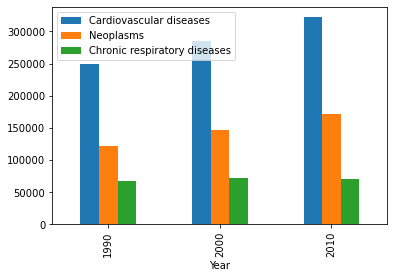

In [ ]:
new_doc= doc.copy()
year = new_doc.loc[ new_doc['Year'] % 10 == 0]
summ = year.sum(axis = 0, skipna = True)#.round(decimals=0)
ww = pd.DataFrame(summ)
features = ww.iloc[:,4:]#.round(decimals=2)
table = year.pivot_table(columns=features,index='Year') 
df2 = pd.DataFrame(table, columns=['Cardiovascular diseases','Neoplasms','Chronic respiratory diseases'])
df2.plot.bar()

True


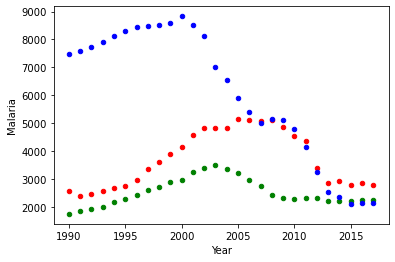

In [ ]:
#vac_url[vac_url['location'].str.contains('Switzerland')]
liberia_mal = doc.loc[3366:3393,['Year','Malaria']]
#liberia_mal
congo_mal = doc.loc[1419:1446,['Year','Malaria']]
#congo_mal
senegal_mal = doc.loc[5081:5108,['Year','Malaria']]
#senegal_mal
#sns.scatterplot(data=congo_mal , x='Year', y='Malaria')

ax1 = liberia_mal.plot(kind='scatter', x='Year', y='Malaria', color='r')    
ax2 = congo_mal.plot(kind='scatter', x='Year', y='Malaria', color='g', ax=ax1)    
ax3 = senegal_mal.plot(kind='scatter', x='Year', y='Malaria', color='b', ax=ax1)

print(ax1 == ax2 == ax3)   

True


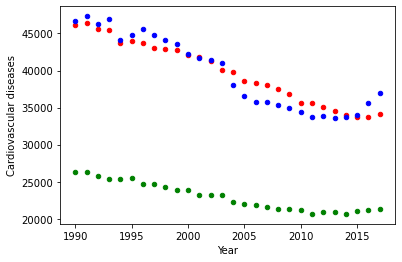

In [ ]:
sweden_car = doc.loc[5728:5755,['Year','Cardiovascular diseases']]
#sweden_car
switzerland_car = doc.loc[5756:5783,['Year','Cardiovascular diseases']]
#switzerland_car
portugal_car = doc.loc[4744:4771,['Year','Cardiovascular diseases']]
#portugal_car
#sns.scatterplot(data=congo_mal , x='Year', y='Malaria')

ax1 = sweden_car.plot(kind='scatter', x='Year', y='Cardiovascular diseases', color='r')    
ax2 = switzerland_car.plot(kind='scatter', x='Year', y='Cardiovascular diseases', color='g', ax=ax1)    
ax3 = portugal_car.plot(kind='scatter', x='Year', y='Cardiovascular diseases', color='b', ax=ax1)

print(ax1 == ax2 == ax3)   

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

In [7]: df = df.cumsum()

In [8]: plt.figure();

In [9]: df.plot();


ניסיון

In [ ]:
sweden_car = doc.loc[:,['Year','Cardiovascular diseases']]
#sweden_car
switzerland_car = doc.loc[:,['Year','Cardiovascular diseases']]
#switzerland_car
portugal_car = doc.loc[:,['Year','Cardiovascular diseases']]
#portugal_car
#sns.scatterplot(data=congo_mal , x='Year', y='Malaria')

ax1 = sweden_car.plot(kind='scatter', x='Year', y='Cardiovascular diseases', color='r')    
#ax2 = switzerland_car.plot(kind='scatter', x='Year', y='Cardiovascular diseases', color='g', ax=ax1)    
#ax3 = portugal_car.plot(kind='scatter', x='Year', y='Cardiovascular diseases', color='b', ax=ax1)

#print(ax1 == ax2 == ax3) 
ax1 

In [ ]:
<div>
<img src="תמונות/aaa.PNG" width="700"/>
</div>

In [ ]:
import Pillow as Image
myImage = Image.open("https://drive.google.com/drive/u/0/my-drive")
myImage.show()


גרף של ישראל, מדינה שמקצה המון משאבים ללוחמה בטרור ולבטחון בגלל איומים קיומיים תמידים - אך מצד שני, יש לשים לב לפרופורציה בין זה לבין הצורך בהשקעה בתשתיות ובהכוונה וליווי נפשיים - כיוון שבמקרים אלו האבידות גדולות.

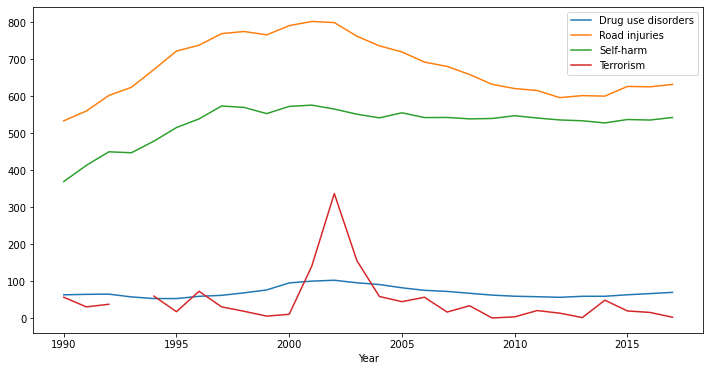

In [ ]:
israel_ter = doc.loc[2927:2954,['Year','Terrorism','Road injuries', 'Self-harm','Drug use disorders']]
table2 = israel_ter.pivot_table(index='Year') 
table2.plot.line(figsize=(12,6))


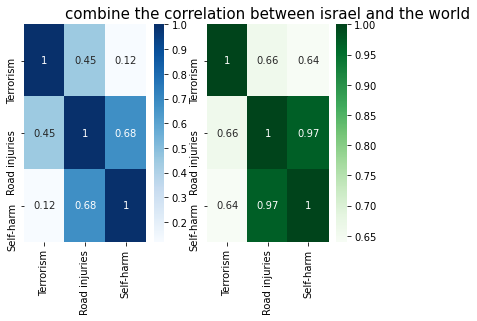

In [ ]:
features = ['Terrorism','Road injuries', 'Self-harm']#,'Drug use disorders']
correlation_matrix = table2[features].corr().round(2)
correlation_matrix1 = doc[features].corr().round(2)
fig, (ax1, ax2) = plt.subplots(1,2)
mapp = sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True, ax=ax1)
plt.title('combine the correlation between israel and the world', fontsize = 15)
mapp2 = sns.heatmap(data=correlation_matrix1,cmap='Greens', annot=True, ax=ax2)
plt.show()

קורלציה בכל מדינות העולם בין: סמים, אלימות בין אישית, בעיות בלידה
קורלציה נמוכה בין סמים לבעיות בלידה@
גבוהה בין סמים ואלימות בין אישית - לתאונות דרכים@
יחסית זהה בין אלימות ובעיות בלידה, ואלימות וסמים@

In [ ]:
#features = ['Interpersonal violence','Drug use disorders', 'Maternal disorders', 'Road injuries']
#correlation_matrix = doc[features].corr().round(2)
#correlation_matrix
#sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True)

קורלציה בכל העולם בין סוגי מחלות מעיים שונות
הכל די גבוה, אבל הכי גבוה זה תזונה ושלשול
@ואחריו זיהום ושלשול

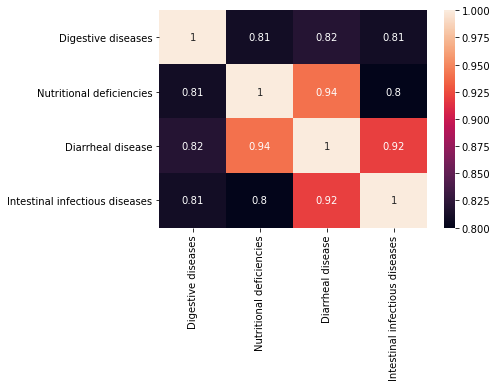

In [ ]:
features2 = ['Digestive diseases', 'Nutritional deficiencies', 'Diarrheal disease', 'Intestinal infectious diseases']
correlation_matrix = doc[features2].corr().round(2)
correlation_matrix
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
lebanon = doc.loc[3310:3337, ['Entity','Year','Drug use disorders', 'Road injuries','Drowning']]
lebanon
features = ['Drowning','Road injuries']
X = lebanon[features]
y = lebanon['Drug use disorders']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 
model = sk.tree.DecisionTreeRegressor(random_state=1)
model.fit(X_train,y_train)
print("Making predictions for Drug use disorders:")
prediction=pd.DataFrame(y_test)
prediction.head(4)

In [ ]:
def eval(x,y,model):                  
    pred = model.predict(x)
    y_alt=y.values
    print("MSE: {:.3f}".format(mse(pred,y,squared=False)))

eval(X_test,y_test,model)

In [ ]:
import plotly.graph_objs as gobj
from IPython.display import HTML
import plotly.offline as py

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os


year17 = doc.loc[2004 == doc['Year']]

data = dict(
    type = 'choropleth', 
    locations = year17['Entity'],
    locationmode = 'country names', 
    colorscale = [[0,"rgb(255, 60, 20)"],[0.25,"rgb(255, 100, 20)"],[0.5,"rgb(255, 140, 20)"]],
    text =  year17['Entity'], 
    z = year17['Malaria'], 
    colorbar = {'title':'malaria in the world'}
)

layout = dict(geo = dict(scope ='world'))
choromap = gobj.Figure(data = [data],layout=layout)
plot(choromap)
from IPython.display import HTML

HTML('<iframe src=temp-plot.html width=700 height=450></.iframe>')

In [ ]:
year17 = doc.loc[2004 == doc['Year']]

data = dict(
    type = 'choropleth', 
    locations = year17['Entity'],
    locationmode = 'country names', 
    colorscale = [[0,"rgb(255, 60, 20)"],[0.25,"rgb(255, 100, 20)"],[0.5,"rgb(255, 140, 20)"]],
    text =  year17['Entity'], 
    z = year17['Malaria'], 
    colorbar = {'title':'malaria in africa'}
)

layout = dict(geo = dict(scope ='africa'))
choromap = gobj.Figure(data = [data],layout=layout)
plot(choromap)


HTML('<iframe src=temp-plot.html width=700 height=450></.iframe>')